In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
df=pd.read_csv('C:/Users/Ankan/Downloads/final_gc_anolomy.csv')

In [2]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)
df  = df[df['building_number']==4]
df.tail()

,timestamp,main_meter,sub_meter_1,sub_meter_2,building_number,weekend,corporate,main_meter_4,main_meter_12,day of week_0,day of week_1,day of week_2,day of week_3,day of week_4,day of week_5,day of week_6
26395,2017-12-31 19:00:00,3659.553492,6.857998,1184.460127,4,1,1,8642.364573,7221.259176,0,0,0,0,0,0,1
26396,2017-12-31 20:00:00,3515.897324,7.327728,1224.011931,4,1,0,3425.900099,7221.259176,0,0,0,0,0,0,1
26397,2017-12-31 21:00:00,3217.272386,8.154114,825.583543,4,1,0,3425.900099,7221.259176,0,0,0,0,0,0,1
26398,2017-12-31 22:00:00,3237.189207,7.949655,961.699426,4,1,0,3425.900099,7221.259176,0,0,0,0,0,0,1
26399,2017-12-31 23:00:00,3733.241478,11.252074,1047.407876,4,1,0,3425.900099,7221.259176,0,0,0,0,0,0,1


In [3]:
df=df.drop(columns=['sub_meter_1','main_meter','building_number','weekend','corporate','main_meter_4','main_meter_12','day of week_0','day of week_1','day of week_2','day of week_3','day of week_4','day of week_5','day of week_6'])
df=df.set_index('timestamp')
df.head()

,sub_meter_2
timestamp,
2017-01-04 00:00:00,1060.180109
2017-01-04 01:00:00,979.815876
2017-01-04 02:00:00,1084.277988
2017-01-04 03:00:00,1121.775333
2017-01-04 04:00:00,833.165040


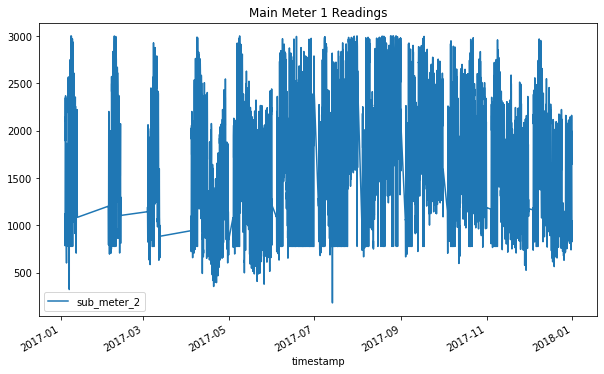

In [4]:
from plotly.offline import plot
import cufflinks as cf
df.plot(title="Main Meter 1 Readings", figsize=(10,6))

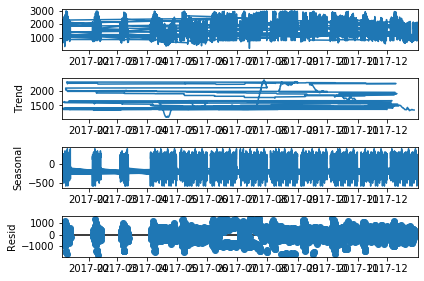

In [5]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive',period=168)
fig=result.plot()

In [6]:
from pmdarima import auto_arima
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=5, max_q=5,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

C:\Users\Ankan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

C:\Users\Ankan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



Fit ARIMA: order=(1, 1, 1); AIC=98423.202, BIC=98450.381, Fit time=1.527 seconds
Fit ARIMA: order=(0, 1, 0); AIC=99405.406, BIC=99418.995, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=98999.801, BIC=99020.185, Fit time=0.048 seconds
Fit ARIMA: order=(0, 1, 1); AIC=98964.707, BIC=98985.091, Fit time=0.031 seconds
Fit ARIMA: order=(2, 1, 1); AIC=98333.608, BIC=98367.582, Fit time=1.822 seconds
Fit ARIMA: order=(2, 1, 0); AIC=98982.075, BIC=99009.254, Fit time=0.044 seconds
Fit ARIMA: order=(2, 1, 2); AIC=98324.758, BIC=98365.526, Fit time=3.150 seconds
Fit ARIMA: order=(3, 1, 3); AIC=98292.919, BIC=98347.276, Fit time=5.321 seconds
Fit ARIMA: order=(2, 1, 3); AIC=98017.241, BIC=98064.804, Fit time=4.813 seconds
Fit ARIMA: order=(2, 1, 4); AIC=97598.495, BIC=97652.853, Fit time=16.343 seconds
Fit ARIMA: order=(1, 1, 3); AIC=98310.178, BIC=98350.946, Fit time=2.950 seconds
Fit ARIMA: order=(3, 1, 5); AIC=97475.871, BIC=97543.818, Fit time=8.919 seconds
Fit ARIMA: order=(2, 1, 5);

In [7]:
train = df.loc['01-04-2017 00:00:00':'07-11-2017 00:00:00']
test = df.loc['07-11-2017 00:00:00':]
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(3, 1, 5),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend=None, with_intercept=True)

In [8]:
future_forecast = stepwise_model.predict(n_periods=1320)
future_forecast

array([1073.90005633, 1200.3547144 , 1298.42629441, ..., 1410.9527119 ,
       1410.93622771, 1410.91974355])

In [9]:
a=pd.DataFrame(data=future_forecast)
a.to_csv('updatedb4m3.csv')

# add the code to show actual vs predicted
